<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_44_Percentile_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df.shape

(10000, 3)

In [7]:
import seaborn as sns

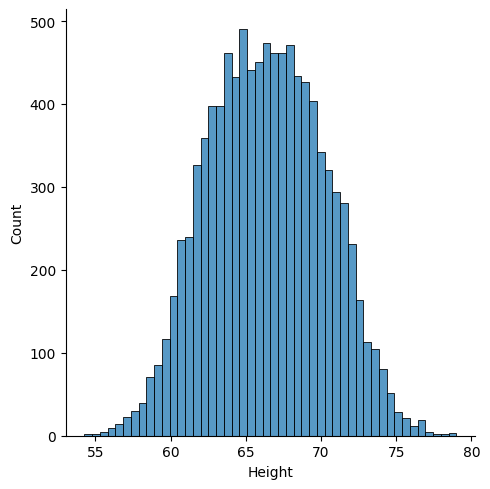

In [11]:
sns.displot(df['Height'])

<Axes: >

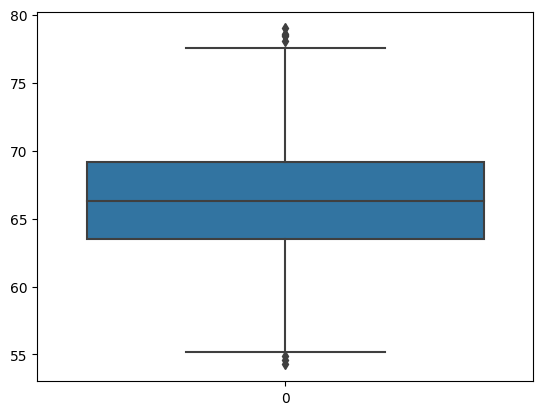

In [13]:
sns.boxplot(df['Height'])

In [14]:
upper = df['Height'].quantile(0.99)

In [15]:
lower = df['Height'].quantile(0.01)

In [16]:
upper,lower

(74.7857900583366, 58.13441158671655)

In [19]:
new_df = df[(df['Height']<74.8) & (df['Height']>=58)]

In [20]:
new_df.shape

(9811, 3)

In [21]:
new_df.describe()

,Height,Weight
count,9811.000000,9811.000000
mean,66.358487,161.356603
std,3.653636,30.984787
min,58.032173,77.523774
25%,63.571564,136.250594
50%,66.316886,161.176218
75%,69.119859,186.747036
max,74.795375,249.946283


<ipython-input-22-edc1cb406df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

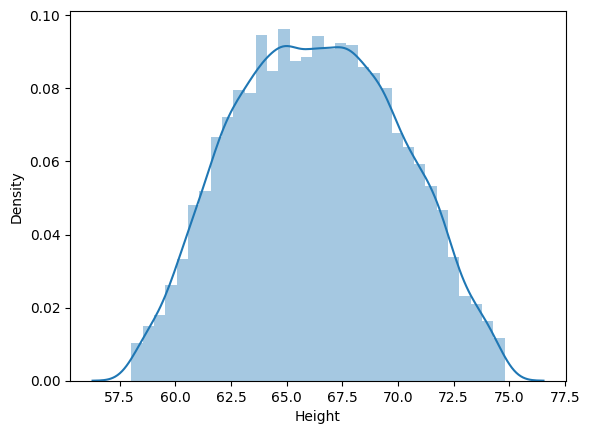

In [22]:
sns.distplot(new_df['Height'])

In [24]:
df['Height'] = np.where(df['Height']>upper,upper,np.where(df['Height']<lower, lower, df['Height']))

In [25]:
df.shape

(10000, 3)

In [26]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


Similarly we can work with Weight column if any outlier is present. Let's check.

<ipython-input-28-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

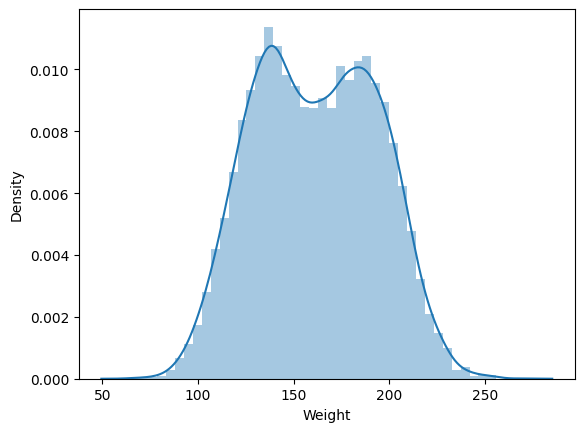

In [28]:
sns.distplot(df['Weight'])

<Axes: >

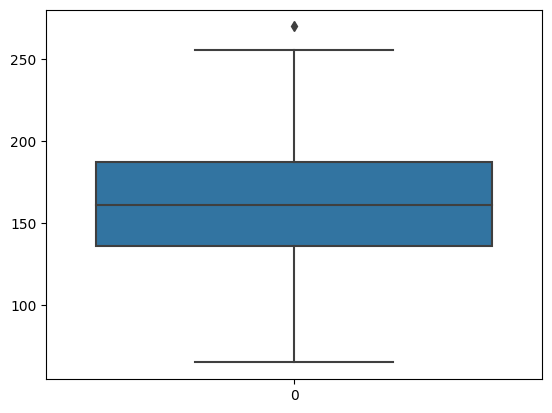

In [29]:
sns.boxplot(df['Weight'])